In [1]:
import time

from dgl.dataloading import GraphDataLoader
import torch

from prob import VRPDGLDataset
from solver import return2Depot
from utils import checkValid, routesPlot

Using backend: pytorch


In [6]:
def run(size):
    """
    A function to evaluate different algorithms

    Args:
        size(int): graph size
        algo (str): name of algorithm
        solver_args (tuple): args of solver
    """
    cnt = 0
    # device
    print("Device:")
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda"
    print("  {}".format(device))
    # load test data
    print("\nLoad data...")
    print("  Graph size: {}".format(size))
    data = VRPDGLDataset(size=size, num_samples=1000)
    batch = 1
    dataloader = GraphDataLoader(data, batch_size=batch, shuffle=False)
    # init solver
    solver = return2Depot(size)
    # solve
    print("\nEvaluating:")
    for batch_data, batch_graph in dataloader:
        cnt += 1
        # to device
        batch_graph = batch_graph.to(device)
        batch_data["loc"] = batch_data["loc"].to(device)
        batch_data["demand"] = batch_data["demand"].to(device)
        batch_data["depot"] = batch_data["depot"].to(device)
        tick = time.time()
        batch_routes, batch_objs = solver.solve(batch_data, batch_graph)
        tock = time.time()
        for i in range(batch):
            obj = batch_objs[i]
            routes = batch_routes[i]
            depot = batch_data["depot"].cpu().detach().numpy()[i]
            loc = batch_data["loc"].cpu().detach().numpy()[i]
            demand = batch_data["demand"].cpu().detach().numpy()[i]
            # print results
            print("Obj Val: {:.4f}".format(obj))
            print("Routes:")
            for r in routes:
                print("  ", "->".join(map(str, r)))
            print("Time elpased: {:.4f} sec".format((tock - tick) / batch))
            # check valid
            assert checkValid(routes, depot, loc, demand), "Infeasible solution."
            # vis
            routesPlot(routes, depot, loc)
        # stop
        if cnt >= 3:
            break
        print()

  2%|▏         | 22/1000 [00:00<00:04, 212.37it/s]

Device:
  cpu

Load data...
  Graph size: 20


100%|██████████| 1000/1000 [00:04<00:00, 204.49it/s]



Loading routing agent...
  [*] Loading model from ./attention_model/pretrained_tsp/tsp_20/epoch-99.pt

Loading return2depot agent...

Evaluating:
Obj Val: 22.9986
Routes:
   19
   16
   18
   5
   12
   6
   17
   8
   11
   7
   9
   2
   3
   0
   1
   13
   10
   15
   4
   14
Time elpased: 0.2509 sec


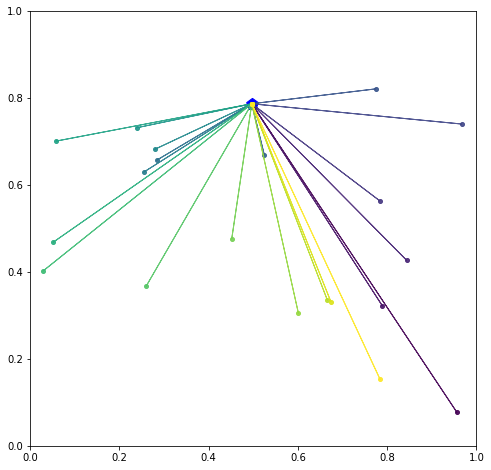


Obj Val: 19.3126
Routes:
   12
   8
   16
   6
   2
   18
   19
   14
   17
   11
   5
   9
   13
   7
   10
   15
   3
   1
   4
   0
Time elpased: 0.2583 sec


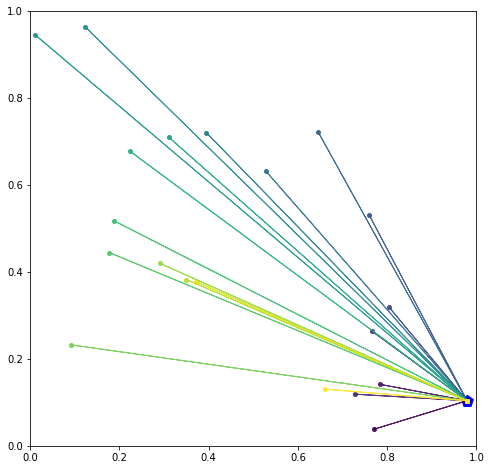


Obj Val: 15.6056
Routes:
   12
   2
   6
   19
   16
   3
   18
   17
   14
   7
   5
   0
   13
   11
   15
   9
   8
   1
   4
   10
Time elpased: 0.2768 sec


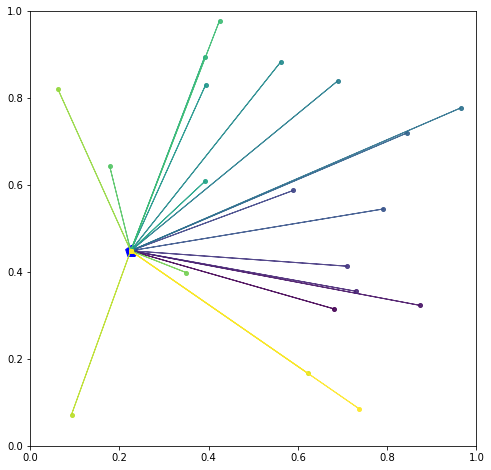

In [8]:
run(size=20)